# Fandango's Rating System Analysis
In 2015, a journalist found a discrepancy on Fandango's rating system after an analysis he conducted using a 209 movie samples. Fandango's system was rounding up ratings in a bizarre way (for instance, 4.1 rounded to 4.5 instead of 4). Fandango root-caused this to bug on the system and promised to fix it.

In this project, I will try to analys some recent data from the website and check if the issue is resolved.

## Datasets:
1. Journalist dataset: https://github.com/fivethirtyeight/data/tree/master/fandango
2. Recent dataset: https://github.com/mircealex/Movie_ratings_2016_17

## Reading & Exploring the Datasets

In [1]:
import pandas as pd
pd.options.display.max_columns = 100

fandango = pd.read_csv("fandango_score_comparison.csv")
movies = pd.read_csv("movie_ratings_16_17.csv")

print(fandango.shape)
fandango.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
print(movies.shape)
movies.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


As our analysis is concerned with Fandango, we will focus on only the columns that are related to this later.
1. Dataset 1: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.
2. Dataset 2: 'movie', 'year', 'fandango'.

In [3]:
fan_relative_db1 = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fan_relative_db2 = movies[['movie', 'year', 'fandango']].copy()

Our population of interest is all the movies in Fandango at any given year.

The sampling does not to be random because the journalist has put forward a few restrictions on his selection procedure. So did the second researcher with his data. Therefore, the samples are unlickly to be respresentative of the population.

## Changing the Goal

For the time being we have two choices: collect new data or change our analysis goal. It seems changing the analysis goal is more attainable.

Our goal shifts to determining if there is any differences in Fandango's ratings for popular movies in 2016 compared to 2015. This solution gives us a good idea to answer our previous goal.

The journalist considered a popular movie as having 30 or over fan rates. For consistency, we will take this criteria and apply it to the second dataset as well.

Our second dataset does not contain information about the fan ratings which makes the process a bit harder. For that, we will sample 10 movies from our second datasets, head to Fandango's website and manually check fan's rating (30 or more) to make sure this dataset is representative.

In [4]:
fan_relative_db2.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The results are (January 2019):
<table class="tg">
  <tbody><tr>
    <th class="tg-amwm">Movie</th>
    <th class="tg-amwm">Fan ratings</th>
  </tr>
  <tr>
    <td class="tg-baqh">Mechanic: Resurrection</td>
    <td class="tg-baqh">2249</td>
  </tr>
  <tr>
    <td class="tg-baqh">Warcraft</td>
    <td class="tg-baqh">7279</td>
  </tr>
  <tr>
    <td class="tg-baqh">Max Steel</td>
    <td class="tg-baqh">494</td>
  </tr>
  <tr>
    <td class="tg-baqh">Me Before You</td>
    <td class="tg-baqh">5270</td>
  </tr>
  <tr>
    <td class="tg-baqh">Fantastic Beasts and Where to Find Them</td>
    <td class="tg-baqh">13400</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Cell</td>
    <td class="tg-yw4l">18</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Genius</td>
    <td class="tg-yw4l">127</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Sully</td>
    <td class="tg-yw4l">11889</td>
  </tr>
  <tr>
    <td class="tg-yw4l">A Hologram for the King</td>
    <td class="tg-yw4l">501</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Captain America: Civil War</td>
    <td class="tg-yw4l">35141</td>
  </tr>
</tbody></table>

90% of the movies are popular according to our criteria. Therefore, the second dataset is representative.

### Remark:
After checking the datasets, we notice that some movies are released in years other than 2015 and 2016. We need to remove those movies.

In [5]:
fan_relative_db1["Year"] = fan_relative_db1['FILM'].str[-5:-1]
fan_relative_db1.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [6]:
fan_relative_db1['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [7]:
movies_2015 = fan_relative_db1[fan_relative_db1['Year'] == "2015"]

In [8]:
movies_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [9]:
fan_relative_db2['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
movies_2016 = fan_relative_db2[fan_relative_db2['year'] == 2016]
movies_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [11]:
movies_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


## Comparing Distribution Shapes of 2015/16

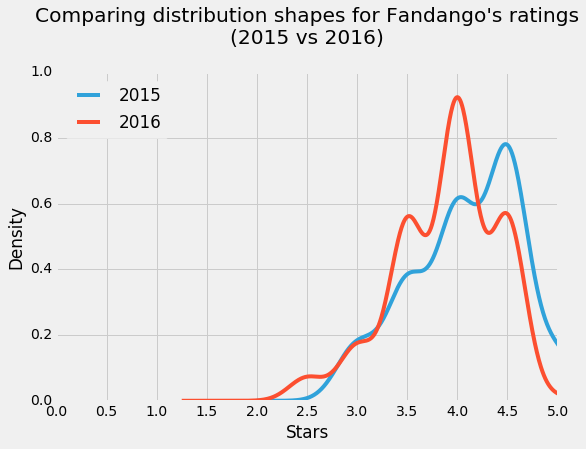

In [12]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movies_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Two aspects are striking on the figure above:

* Both distributions are strongly left skewed.
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.
## Comparing Relative Frequencies
It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [13]:
print('2015' + '\n' + '-' * 16)
movies_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
print('2016' + '\n' + '-' * 16)
movies_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.
## Summary Stats

In [17]:
mean_2015 = movies_2015['Fandango_Stars'].mean()
mean_2016 = movies_2016['fandango'].mean()

median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()

mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]

stats = pd.DataFrame()
stats['2015'] = [mean_2015, median_2015, mode_2015]
stats['2016'] = [mean_2016, median_2016, mode_2016]
stats.index = ['mean', 'median', 'mode']
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


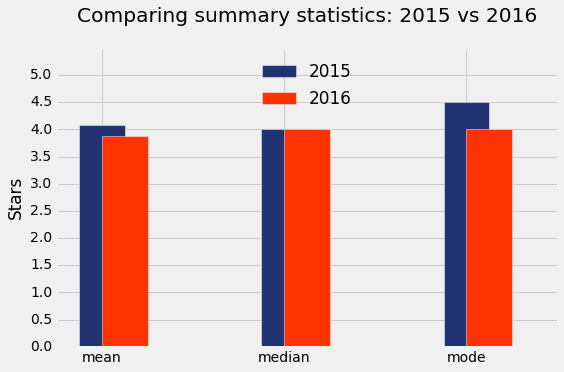

In [25]:
plt.style.use('fivethirtyeight')
stats['2015'].plot.bar(color = '#213372', align = 'center', label = '2015', width = .25)
stats['2016'].plot.bar(color = '#FF3300', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [26]:
(stats.loc['mean'][0] - stats.loc['mean'][1]) / stats.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.
# Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.